# Evanildo Lacerda Jr

Applying to a Risk Data Scientist position at Trustly.

email: elacerdajr@gmail.com
linkedin: www.linkedin.com/in/elacerdajr/


# imports

In [1]:
## basic imports
import numpy as np
import pandas as pd

In [2]:
# plotting imports and settings
%run -i plot_config.py

%config InlineBackend.figure_format = 'retina'


# load and explore data

In [3]:
data = pd.read_csv('dataset_test_ds_v2-Atualizado.csv', encoding='ISO-8859-1')

data.head()

,SAFRA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,CEP,TARGET
0,201901,NaN,8.1,9.99,1968,0.0,0,15.15,0.0,0.0,0,SP,São Paulo,8412006,0
1,201910,0.0,4.4,35.00,1369,0.0,0,63.98,1.0,0.0,0,RJ,Rio de Janeiro,23580304,0
2,201906,0.0,0.7,52.99,1228,0.0,0,98.84,0.0,0.0,0,MG,Belo Horizonte,30421310,0
3,201910,0.0,63.3,810.00,0,0.0,1,9237.21,0.0,0.0,0,SP,São Paulo,8253410,0
4,201902,0.0,4.1,17.50,0,0.0,1,27.70,1.0,0.0,0,ES,Vitória,29017186,0


In [4]:
# see the dataset size
data.shape

(11169, 15)

In [5]:
# target stats
data['TARGET'].value_counts(normalize=True)

0    0.989256
1    0.010744
Name: TARGET, dtype: float64

> It is very important to note that this is a highly imbalaced dataset

## missing values

In [6]:
print('Missing values (%):\n')
for fi in data.columns:
    missing_stat = 100*data[fi].isna().sum() / data.shape[0]
    print(f"{fi:8s} : {missing_stat:.1f} %  {int(missing_stat)*'|'}")


Missing values (%):

SAFRA    : 0.0 %  
V1       : 6.6 %  ||||||
V2       : 2.0 %  ||
V3       : 0.0 %  
V4       : 0.0 %  
V5       : 8.1 %  ||||||||
V6       : 0.0 %  
V7       : 1.4 %  |
V8       : 3.1 %  |||
V9       : 1.0 %  |
V10      : 0.0 %  
V11      : 0.0 %  
V12      : 0.0 %  
CEP      : 0.0 %  
TARGET   : 0.0 %  


> Two of the variables, namely V1 and V5 have a percentage of missing values superior to 5%. That might decrease the performance of our models and could be improved undestanding and fixing the root cause for missing values, if possible.

## geo exploration

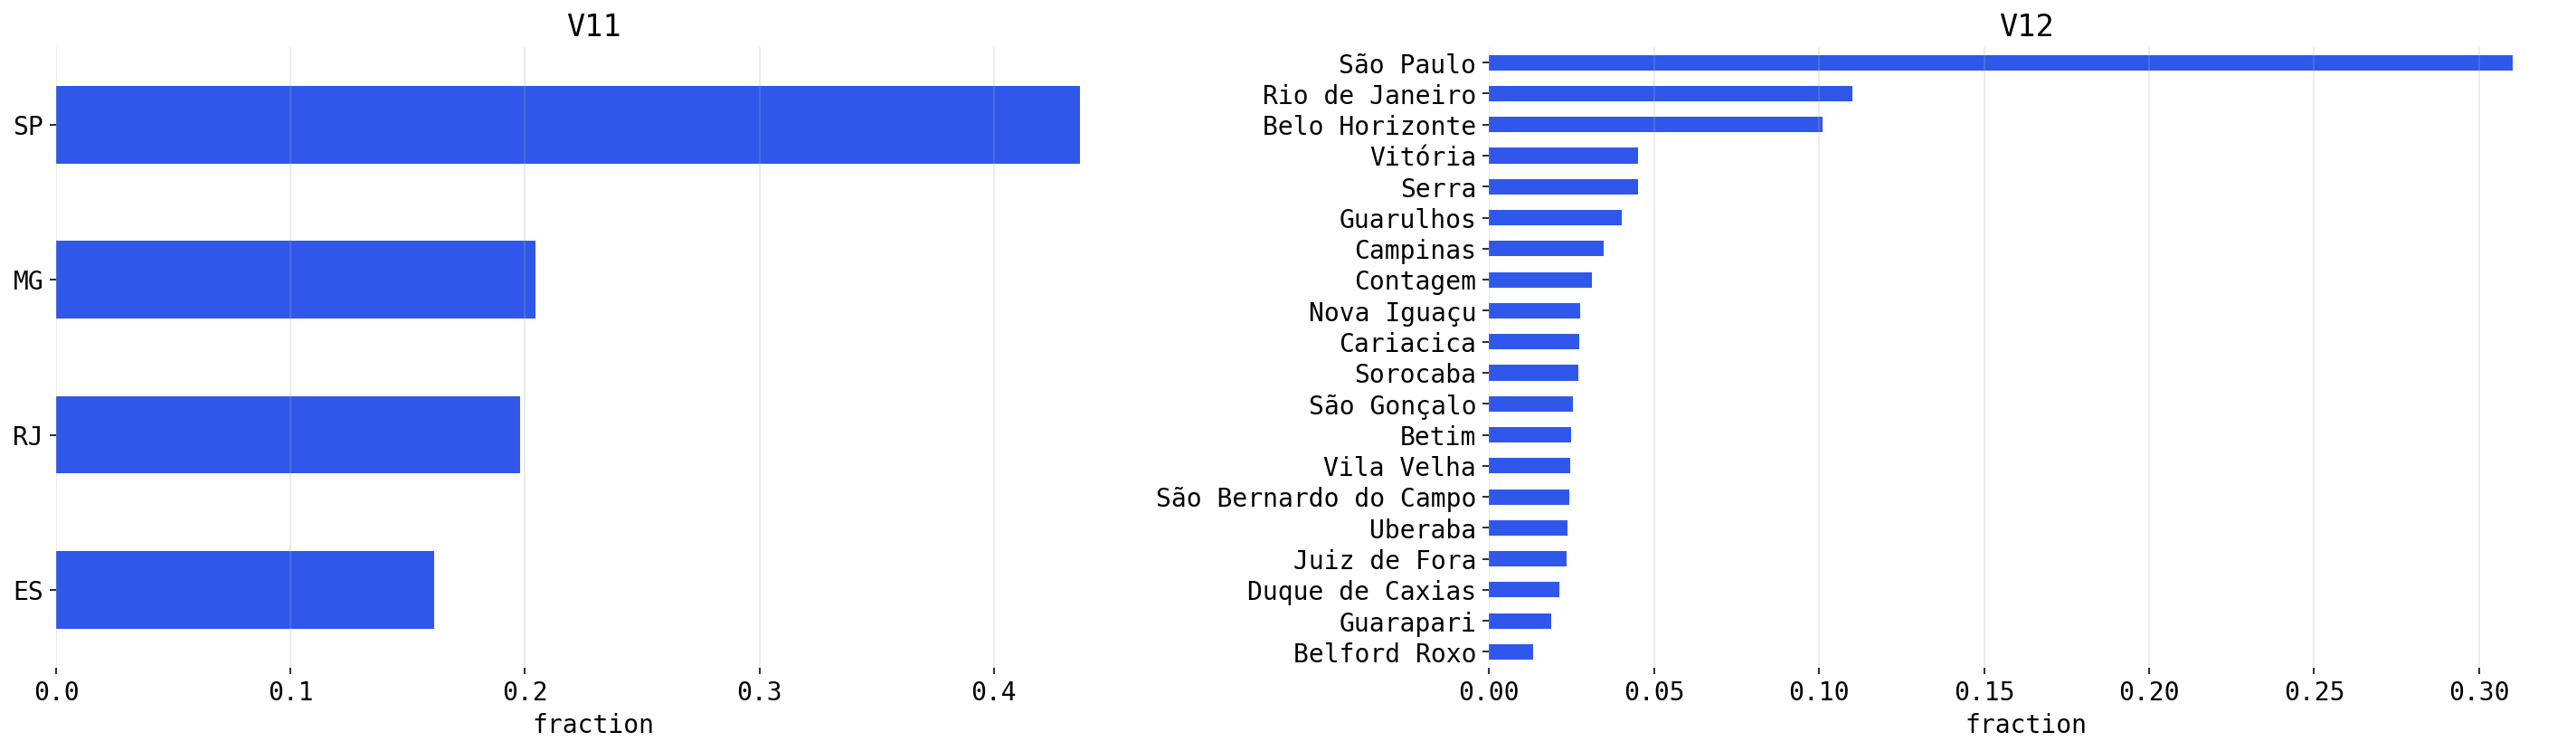

In [7]:
features = ['V11','V12']

fig, axs = plt.subplots(1, len(features), figsize=(20,6))

for fi, ax in zip(features, axs.flatten()):
    data[fi].value_counts(normalize=True, ascending=True).plot(kind='barh', ax =ax)
    
    ax.set_title(fi)
    ax.set(xlabel='fraction')
    ax = clean_ax(ax, n=4)
    ax.grid(True, axis='x', alpha=0.3)
    
plt.tight_layout()
    

> Most datapoint come from the state of SP, and the city of São Paulo.

In [8]:
list(data.select_dtypes(include=['category','object']))

['V11', 'V12']

In [9]:
# new geo variables 
from sklearn import preprocessing as prep

def encode_feature(df, feature):
    
    le = prep.LabelEncoder()
    df['code_'+feature] = le.fit_transform(df[feature])
    return df, le



In [10]:
label_encoder = {}
features_to_encode = ['V11', 'V12']
for fi in features_to_encode:
    data, label_encoder[fi] = encode_feature(data, fi)



In [11]:
# checking
label_encoder['V11'].transform(['SP','ES'])

array([3, 0])

In [12]:
# data.head(2)

## safra explorarion
> We should see if the datapoints have any date trend.

In [13]:
data['SAFRA'].value_counts(ascending=False)

201910    970
201901    963
201905    962
201908    962
201903    952
201904    940
201911    931
201912    927
201909    913
201907    911
201906    907
201902    831
Name: SAFRA, dtype: int64

In [14]:
# introducing new variables
data['date'] = pd.to_datetime(data['SAFRA'], format='%Y%m')
data['date_year'] = pd.to_datetime(data['SAFRA'], format='%Y%m').dt.year
data['date_month'] = pd.to_datetime(data['SAFRA'], format='%Y%m').dt.month

In [15]:
data.head(3)

,SAFRA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,CEP,TARGET,code_V11,code_V12,date,date_year,date_month
0,201901,NaN,8.1,9.99,1968,0.0,0,15.15,0.0,0.0,0,SP,São Paulo,8412006,0,3,16,2019-01-01,2019,1
1,201910,0.0,4.4,35.00,1369,0.0,0,63.98,1.0,0.0,0,RJ,Rio de Janeiro,23580304,0,2,11,2019-10-01,2019,10
2,201906,0.0,0.7,52.99,1228,0.0,0,98.84,0.0,0.0,0,MG,Belo Horizonte,30421310,0,1,1,2019-06-01,2019,6


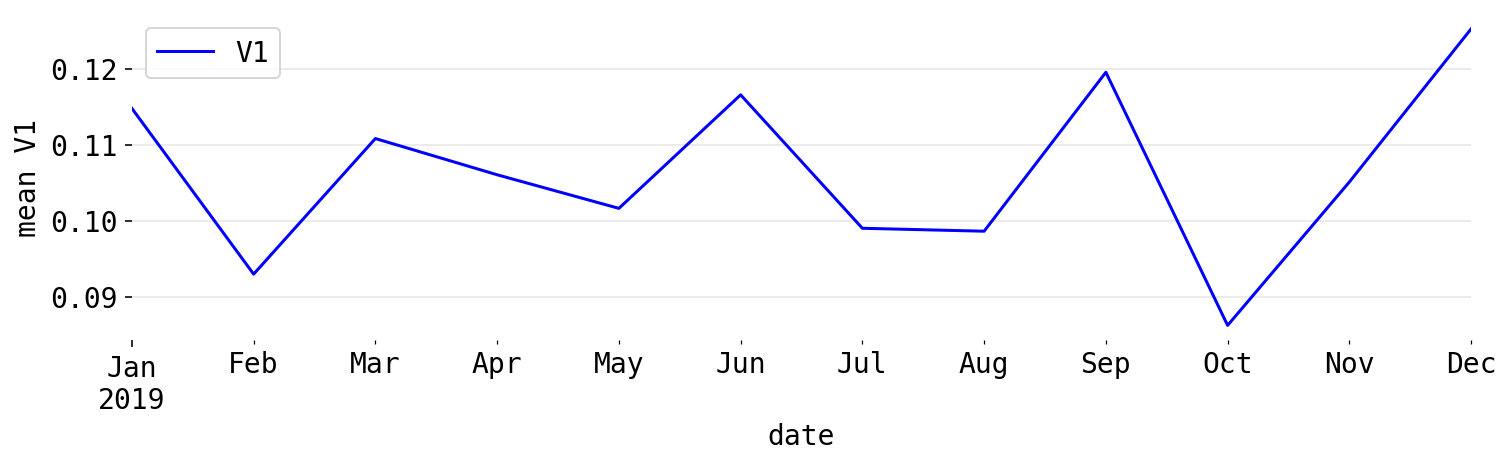

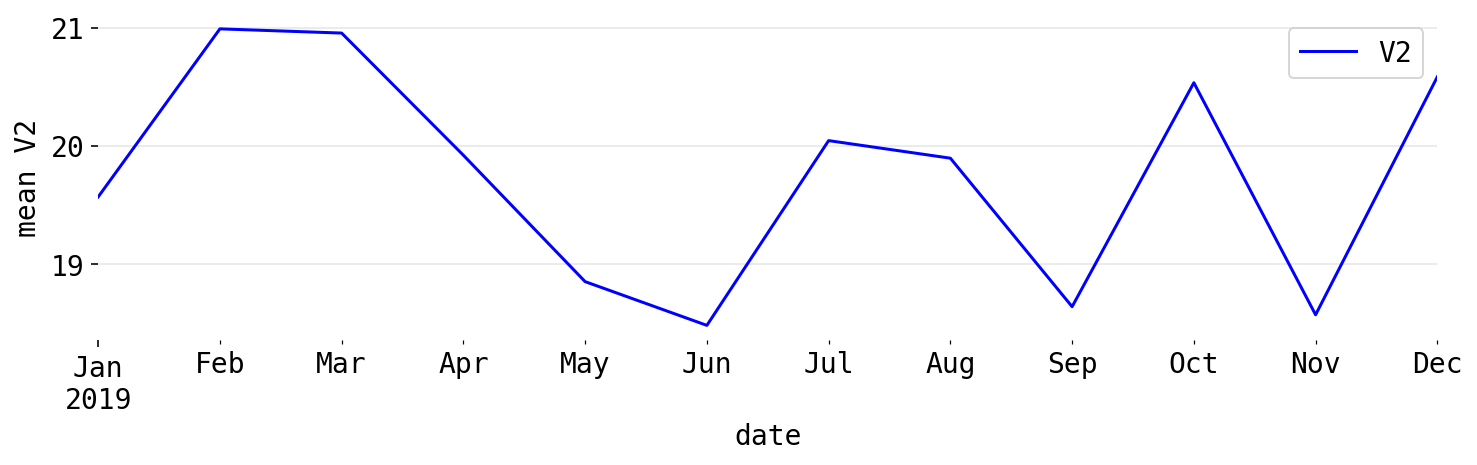

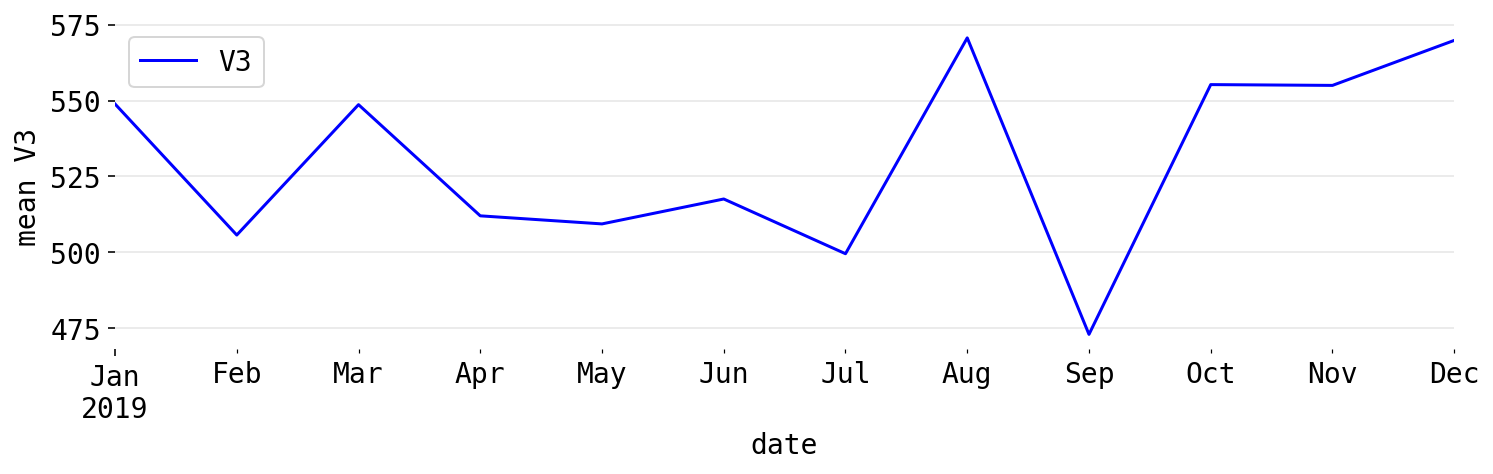

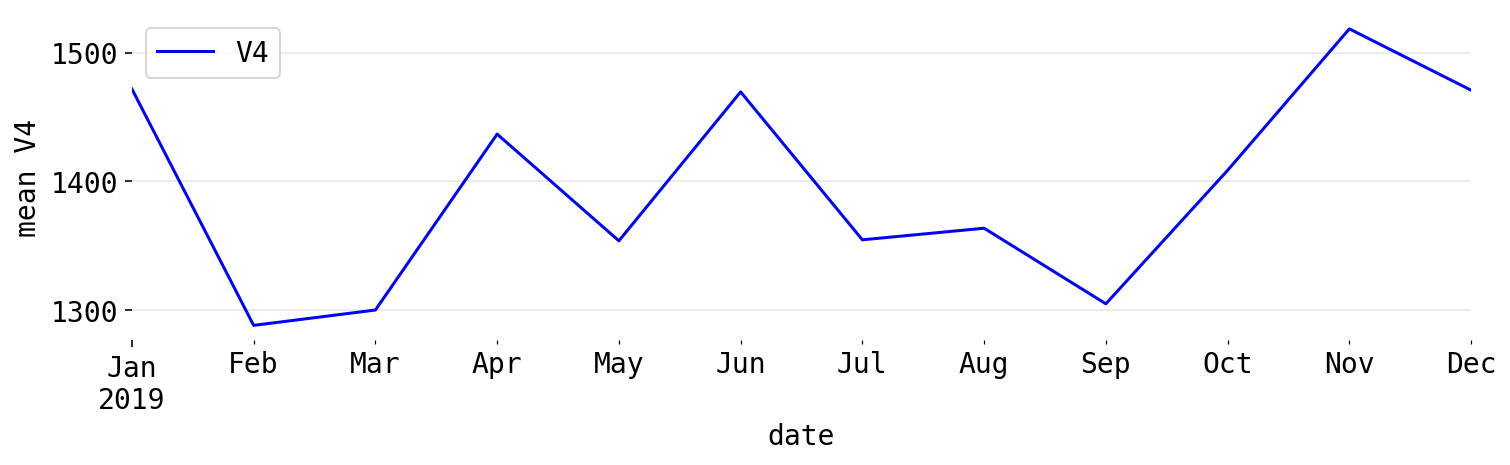

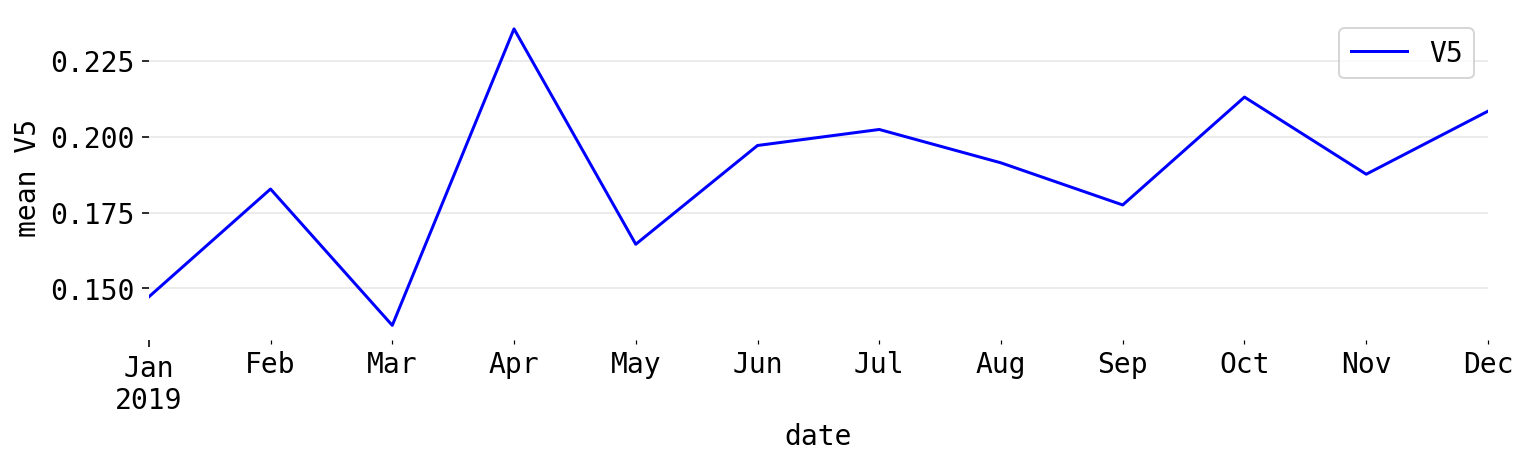

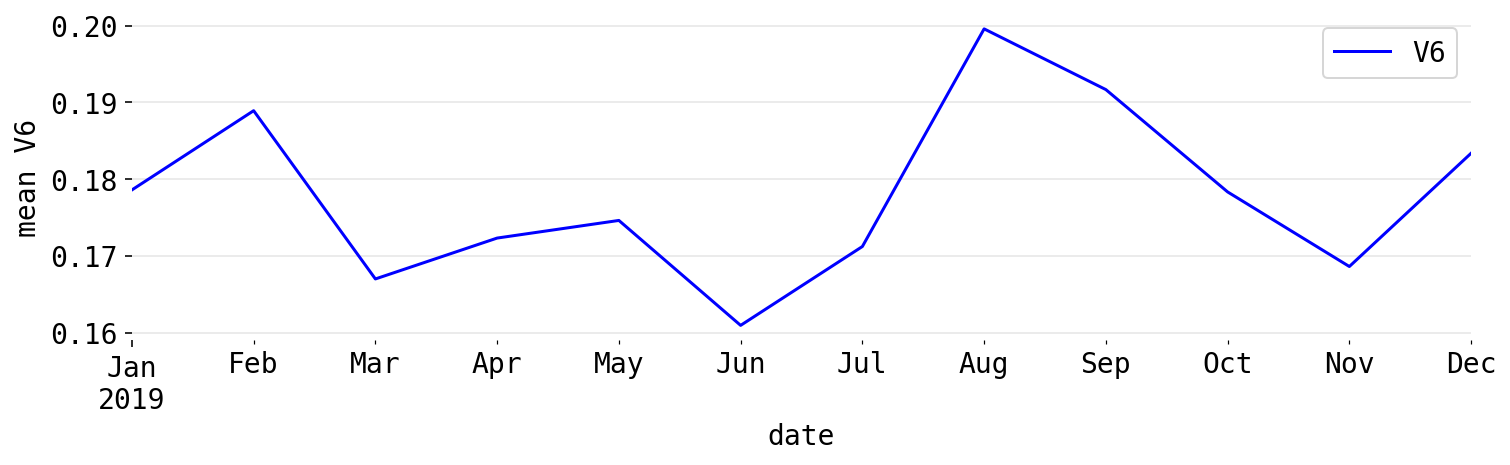

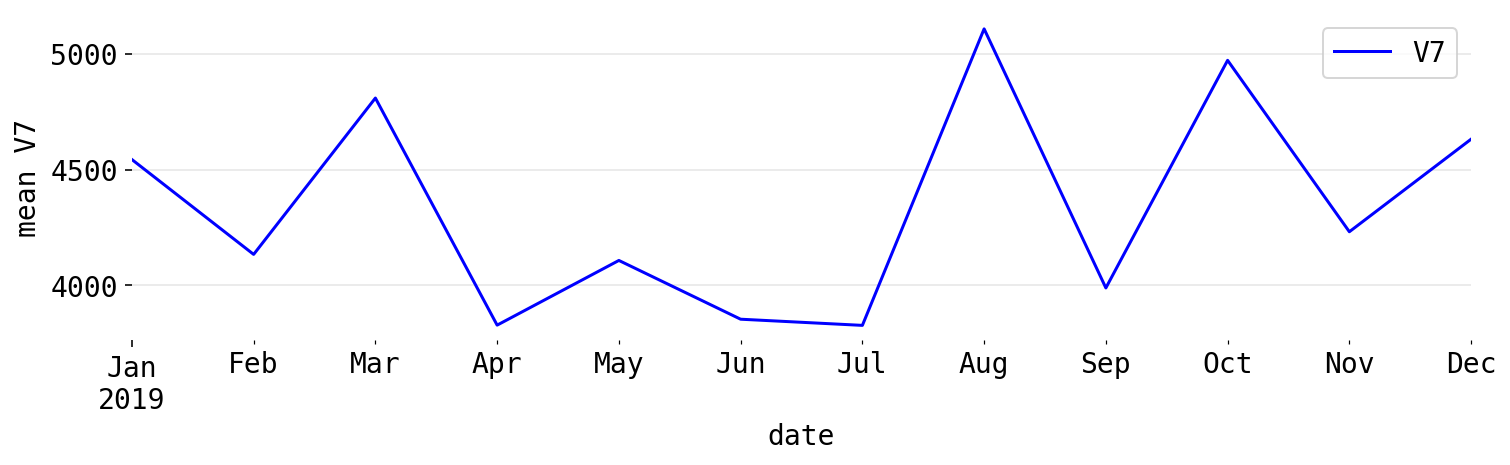

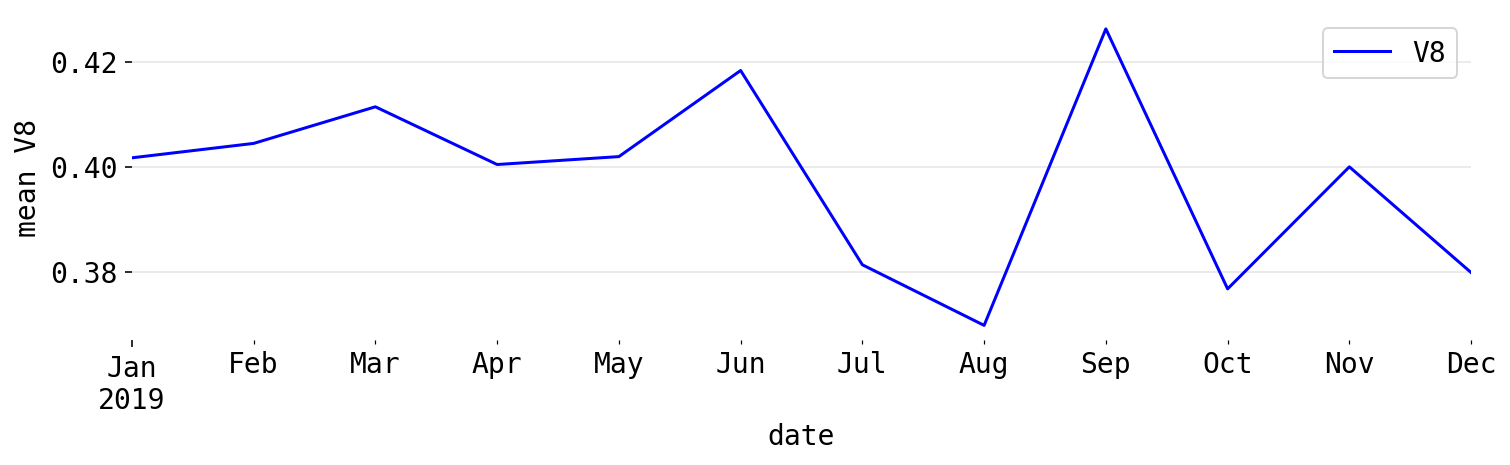

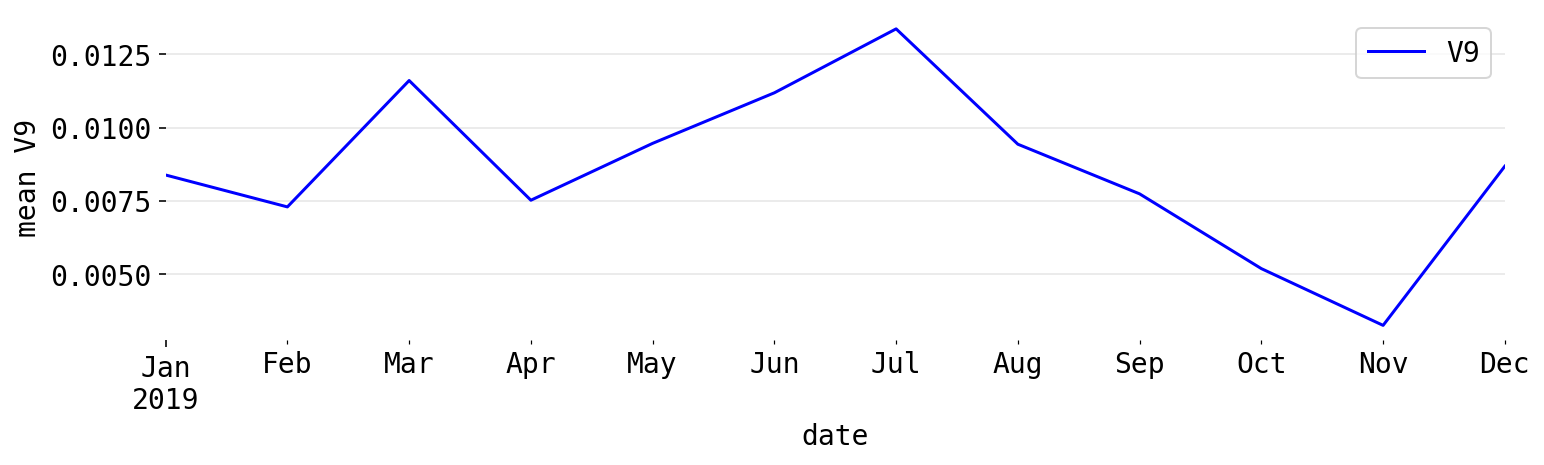

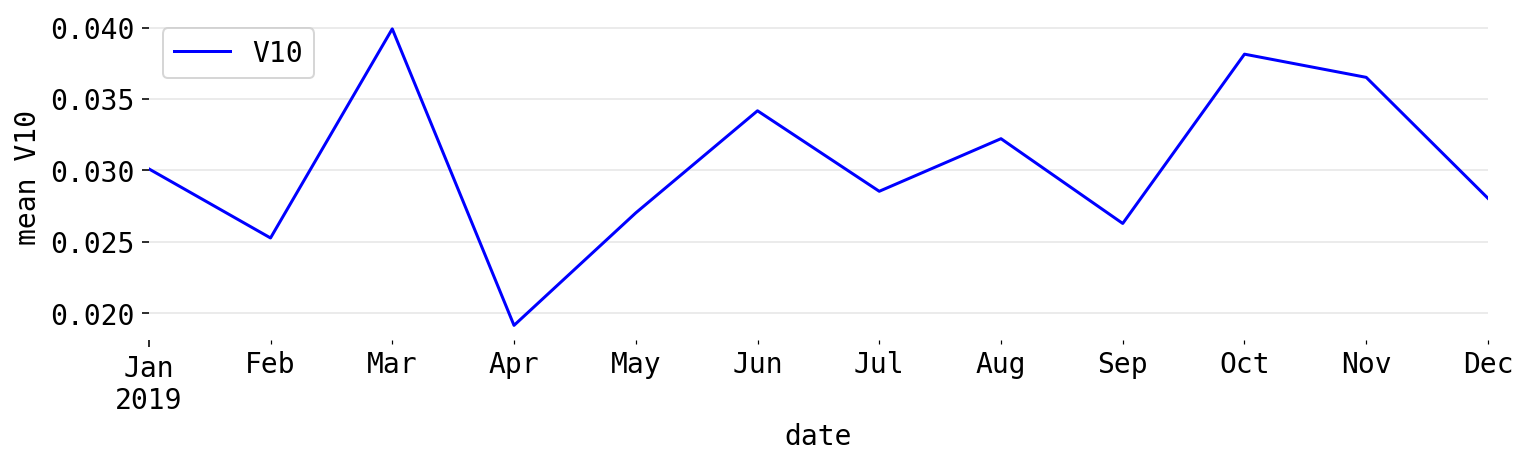

In [16]:
# plotting trends

features = [f'V{i}' for i in range(1,11) ]
for fi in features:
    fig, ax = plt.subplots(figsize=(12,3))
    data[['date',fi]].groupby('date').mean().plot(ax=ax, color='blue')
#     cond0 = data.TARGET == 0
#     data[cond0][['date',fi]].groupby('date').mean().plot(ax=ax, color='blue')
#     cond1 = data.TARGET == 1
#     data[cond1][['date',fi]].groupby('date').mean().plot(ax=ax, color='red', label='minor class', )

    ax.set(ylabel='mean '+fi)
    ax = clean_ax(ax, n=4)
    ax.grid(True, axis='y', alpha=0.3)


> We note that the average value oscillates from month to month. That might be influenced by outliers or effect of seasonality. It is worth to include date_month variable in the model.

## numerical data distribution

Let's see the conditional distribution $p(V_i | target)$

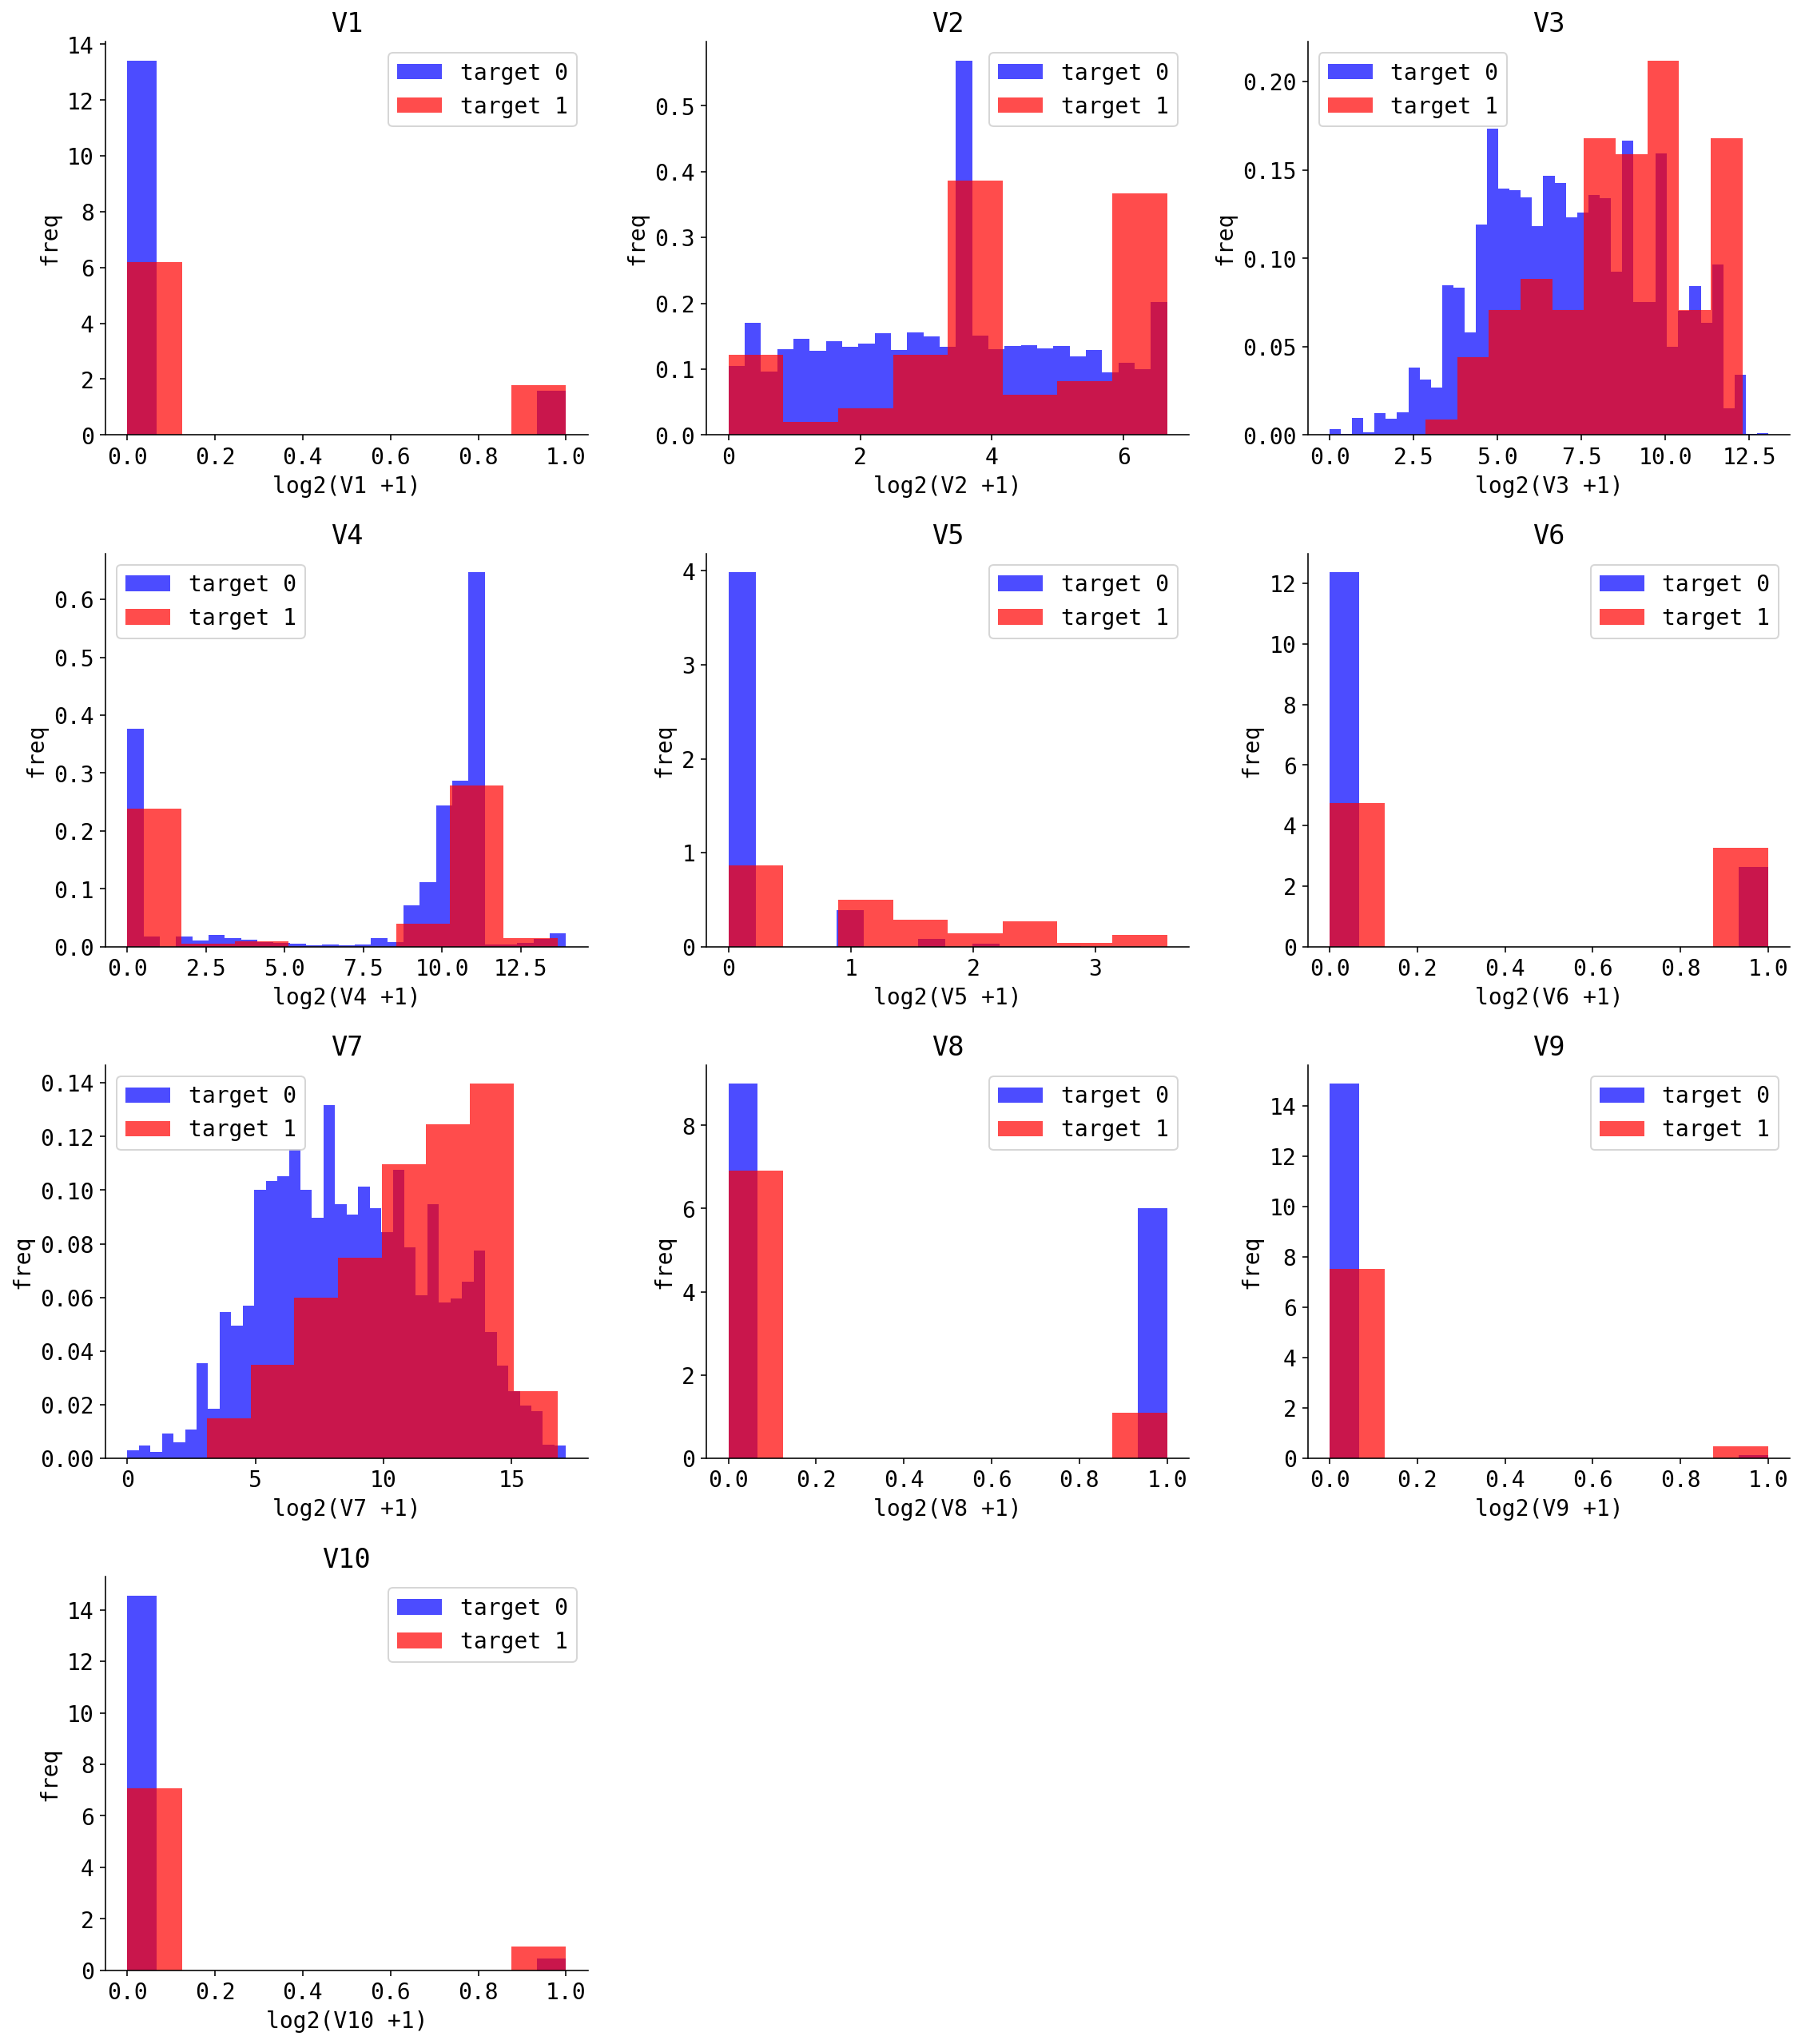

In [17]:
features = [f'V{i}' for i in range(1,11) ]


nrows = int(len(features)/3) +1
ncols = 3



fig, axs = plt.subplots(nrows, ncols , figsize=(16, 18))

for fi,ax in zip(features, axs.flatten()):

    cond0 = data.TARGET == 0
    x = data[cond0][fi]
    ax.hist(np.log2(x+1), bins='auto', density=True, color='blue', alpha=0.7, label='target 0')

    cond1 = data.TARGET == 1
    x = data[cond1][fi]
    ax.hist(np.log2(x+1), bins='auto', density=True, color='red', alpha=0.7, label='target 1')

    
    ax.set(title=fi, ylabel='freq', xlabel=f'log2({fi} +1)')
    ax.legend()
    ax =  clean_ax(ax, n=2)

axs.flat[-2].set_visible(False)
axs.flat[-1].set_visible(False)
plt.tight_layout()

> I have chosen a log-scale tranformation of the data for better visualization (specially for fat tail distributions, as it is typically the case of financial data). By visual inspection I would expect V3, V5 and V7 as import features in a class prediction model. 

# Modelling

Considerations:

 - Since we are dealing with a highly imbalaced class we should pay attention to metrics like precision, recall and f1. 
 - We will adopt here a gradient boosting tree model (xgboost) to take advantage of the way it deals with missing values and unscaled data. 
 - Depending on the nature of the target and the business involved we might want to have a good trade off between ability of the classifier to find all the positive samples (recall) and the ability not to label as positive a sample that is negative (precision). 

In [404]:
# extra feature from cep to capture more well defined locations
data['cep4'] = data.CEP.apply(lambda x: int(str(x)[:4]) )

In [405]:
# also create log scale features 
selected_features_V = [f'V{i}' for i in range(1,11) ]

for fi in selected_features_V:
    data['log2_'+fi] = np.log2(data[fi] +1)
    
selected_features_log = ['log2_'+f for f in selected_features_V]

In [406]:
# selecting the features


selected_features = selected_features_V + ['date_month', 'code_V11', 'code_V12','cep4'] + selected_features_log
print(selected_features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'date_month', 'code_V11', 'code_V12', 'cep4', 'log2_V1', 'log2_V2', 'log2_V3', 'log2_V4', 'log2_V5', 'log2_V6', 'log2_V7', 'log2_V8', 'log2_V9', 'log2_V10']


In [231]:
# splitting the dataset

from sklearn.model_selection import train_test_split

# df = data.dropna()
df = data.copy()
X = df[selected_features]
y = df.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y )

In [232]:
# import lib for modeling
import xgboost as xgb
import optuna

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

import warnings
warnings.filterwarnings("ignore")

In [233]:
# checking proportions
y_train.value_counts(normalize=True)

0    0.989256
1    0.010744
Name: TARGET, dtype: float64

In [234]:
# checking proportions
y_test.value_counts(normalize=True)

0    0.989257
1    0.010743
Name: TARGET, dtype: float64

**We are going to use optuna to maximize the ROC AUC metric.**

In [338]:
def objective(trial, X, y):
    """Define objective function for hyperparameter optimization

    """

    # Suggest values of the hyperparameters using a trial object.
    params = {'eval_metric': 'logloss',
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
                  'max_depth': trial.suggest_int('max_depth', 1, 50),
                  'n_estimators': trial.suggest_int('n_estimators', 1, 400)
             }
    
    base_model = xgb.XGBClassifier(tree_method='hist', predictor='cpu_predictor', )
    model = base_model.set_params(**params)
    
    skf = StratifiedKFold(n_splits=5, shuffle = True)
    scores = cross_validate(model
                            , X
                            , y
                            , scoring=['roc_auc']
                            , cv=skf.split(X, y)
                            )
    
    return np.mean(scores['test_roc_auc'])

> The objetive function optmize the hyperparameter for maximum average ROC_AUC. This could also be set to multiple objectives, such as precision and recall.

In [339]:

study = optuna.create_study(study_name= "xgb_model_opt", direction= 'maximize')

[I 2022-07-11 03:50:37,882] A new study created in memory with name: xgb_model_opt


In [340]:
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=200)

[I 2022-07-11 03:50:39,778] Trial 0 finished with value: 0.839701519770131 and parameters: {'learning_rate': 0.14744620111767046, 'max_depth': 33, 'n_estimators': 316}. Best is trial 0 with value: 0.839701519770131.
[I 2022-07-11 03:50:41,361] Trial 1 finished with value: 0.8415934726316581 and parameters: {'learning_rate': 0.041379701466774284, 'max_depth': 33, 'n_estimators': 308}. Best is trial 1 with value: 0.8415934726316581.
[I 2022-07-11 03:50:41,516] Trial 2 finished with value: 0.8235744868680293 and parameters: {'learning_rate': 0.07905266782039477, 'max_depth': 22, 'n_estimators': 23}. Best is trial 1 with value: 0.8415934726316581.
[I 2022-07-11 03:50:42,706] Trial 3 finished with value: 0.8297945135568291 and parameters: {'learning_rate': 0.1307144486624945, 'max_depth': 37, 'n_estimators': 311}. Best is trial 1 with value: 0.8415934726316581.
[I 2022-07-11 03:50:43,223] Trial 4 finished with value: 0.6884587742626627 and parameters: {'learning_rate': 0.0017224407753062417

[I 2022-07-11 03:51:21,104] Trial 36 finished with value: 0.7156749340490617 and parameters: {'learning_rate': 0.003031501218138004, 'max_depth': 18, 'n_estimators': 226}. Best is trial 33 with value: 0.8626809488056224.
[I 2022-07-11 03:51:21,951] Trial 37 finished with value: 0.8612130792679882 and parameters: {'learning_rate': 0.026581295090694228, 'max_depth': 6, 'n_estimators': 177}. Best is trial 33 with value: 0.8626809488056224.
[I 2022-07-11 03:51:22,795] Trial 38 finished with value: 0.8366570020444064 and parameters: {'learning_rate': 0.013586762708112179, 'max_depth': 7, 'n_estimators': 177}. Best is trial 33 with value: 0.8626809488056224.
[I 2022-07-11 03:51:23,273] Trial 39 finished with value: 0.7977809496566183 and parameters: {'learning_rate': 0.006180772410952657, 'max_depth': 4, 'n_estimators': 178}. Best is trial 33 with value: 0.8626809488056224.
[I 2022-07-11 03:51:24,293] Trial 40 finished with value: 0.6850207832338299 and parameters: {'learning_rate': 0.001026

[I 2022-07-11 03:51:38,723] Trial 72 finished with value: 0.8709155513662736 and parameters: {'learning_rate': 0.7940941042021898, 'max_depth': 1, 'n_estimators': 138}. Best is trial 58 with value: 0.8731391438378047.
[I 2022-07-11 03:51:39,161] Trial 73 finished with value: 0.8025711372160742 and parameters: {'learning_rate': 0.6444533440196419, 'max_depth': 5, 'n_estimators': 129}. Best is trial 58 with value: 0.8731391438378047.
[I 2022-07-11 03:51:39,365] Trial 74 finished with value: 0.8712515126694814 and parameters: {'learning_rate': 0.41562110001475155, 'max_depth': 1, 'n_estimators': 142}. Best is trial 58 with value: 0.8731391438378047.
[I 2022-07-11 03:51:39,842] Trial 75 finished with value: 0.8442405187886328 and parameters: {'learning_rate': 0.24908958179833243, 'max_depth': 5, 'n_estimators': 146}. Best is trial 58 with value: 0.8731391438378047.
[I 2022-07-11 03:51:40,529] Trial 76 finished with value: 0.8492850953461997 and parameters: {'learning_rate': 0.1676162130717

[I 2022-07-11 03:51:52,109] Trial 108 finished with value: 0.8584993784410908 and parameters: {'learning_rate': 0.0471723681624352, 'max_depth': 5, 'n_estimators': 120}. Best is trial 58 with value: 0.8731391438378047.
[I 2022-07-11 03:51:52,474] Trial 109 finished with value: 0.8458352921401888 and parameters: {'learning_rate': 0.06731808233644178, 'max_depth': 3, 'n_estimators': 154}. Best is trial 58 with value: 0.8731391438378047.
[I 2022-07-11 03:51:52,922] Trial 110 finished with value: 0.8324503537461299 and parameters: {'learning_rate': 0.4145081142098481, 'max_depth': 21, 'n_estimators': 108}. Best is trial 58 with value: 0.8731391438378047.
[I 2022-07-11 03:51:53,118] Trial 111 finished with value: 0.8771960101262588 and parameters: {'learning_rate': 0.23803228052335063, 'max_depth': 1, 'n_estimators': 135}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:51:53,364] Trial 112 finished with value: 0.8668841276361743 and parameters: {'learning_rate': 0.144107

[I 2022-07-11 03:52:05,671] Trial 144 finished with value: 0.8168807657726769 and parameters: {'learning_rate': 0.03354039259455736, 'max_depth': 1, 'n_estimators': 108}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:52:06,093] Trial 145 finished with value: 0.8543255967779629 and parameters: {'learning_rate': 0.04040795429758403, 'max_depth': 3, 'n_estimators': 171}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:52:06,415] Trial 146 finished with value: 0.8629197960640415 and parameters: {'learning_rate': 0.09182768459942467, 'max_depth': 2, 'n_estimators': 157}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:52:06,863] Trial 147 finished with value: 0.8323124592364444 and parameters: {'learning_rate': 0.12795346119791493, 'max_depth': 4, 'n_estimators': 137}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:52:07,138] Trial 148 finished with value: 0.8698240506712362 and parameters: {'learning_rate': 0.59

[I 2022-07-11 03:52:20,021] Trial 180 finished with value: 0.8580992561190651 and parameters: {'learning_rate': 0.1309409108243067, 'max_depth': 1, 'n_estimators': 207}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:52:20,308] Trial 181 finished with value: 0.849402103260509 and parameters: {'learning_rate': 0.030818387300581583, 'max_depth': 1, 'n_estimators': 166}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:52:20,601] Trial 182 finished with value: 0.846058794420931 and parameters: {'learning_rate': 0.03661457492910082, 'max_depth': 2, 'n_estimators': 157}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:52:21,010] Trial 183 finished with value: 0.8615633411729879 and parameters: {'learning_rate': 0.046279021593271207, 'max_depth': 3, 'n_estimators': 140}. Best is trial 111 with value: 0.8771960101262588.
[I 2022-07-11 03:52:21,282] Trial 184 finished with value: 0.8617182248529411 and parameters: {'learning_rate': 0.041

In [407]:
df_study = study.trials_dataframe()

# value = mean(roc_auc)
df_study.sort_values(by='value', ascending=False).head(5)

,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_max_depth,params_n_estimators,state
111,111,0.877196,2022-07-11 03:51:52.922892,2022-07-11 03:51:53.118191,0 days 00:00:00.195299,0.238032,1,135,COMPLETE
58,58,0.873139,2022-07-11 03:51:35.079394,2022-07-11 03:51:35.238126,0 days 00:00:00.158732,0.166750,1,95,COMPLETE
168,168,0.872599,2022-07-11 03:52:14.144448,2022-07-11 03:52:14.784236,0 days 00:00:00.639788,0.100431,5,176,COMPLETE
74,74,0.871252,2022-07-11 03:51:39.161780,2022-07-11 03:51:39.365018,0 days 00:00:00.203238,0.415621,1,142,COMPLETE
122,122,0.871028,2022-07-11 03:51:57.301158,2022-07-11 03:51:57.485194,0 days 00:00:00.184036,0.113889,1,124,COMPLETE


> We can see that all top 5 results are close.

In [410]:
# Selecting models for evaluation 

number_of_1o_best = 111
number_of_2o_best   = 58

###############################
selected_models = [number_of_1o_best, number_of_2o_best ]
###############################

models_description = {number_of_1o_best:'best'
                      ,  number_of_2o_best: '2o_best'}

In [411]:
moo_model = {}



for i in selected_models:
    print("- Fitting moo model %4d" %i)
    base_model = xgb.XGBClassifier(tree_method='hist', predictor='cpu_predictor')
    moo_model[i] = base_model.set_params(**study.trials[i].params)

    eval_set = [(X_train, y_train), (X_test, y_test)]

    moo_model[i].fit(X_train, y_train,
          verbose=False,
          eval_metric=['logloss','aucpr','auc'],
          eval_set=eval_set,
           early_stopping_rounds=20)

- Fitting moo model  111
- Fitting moo model   58


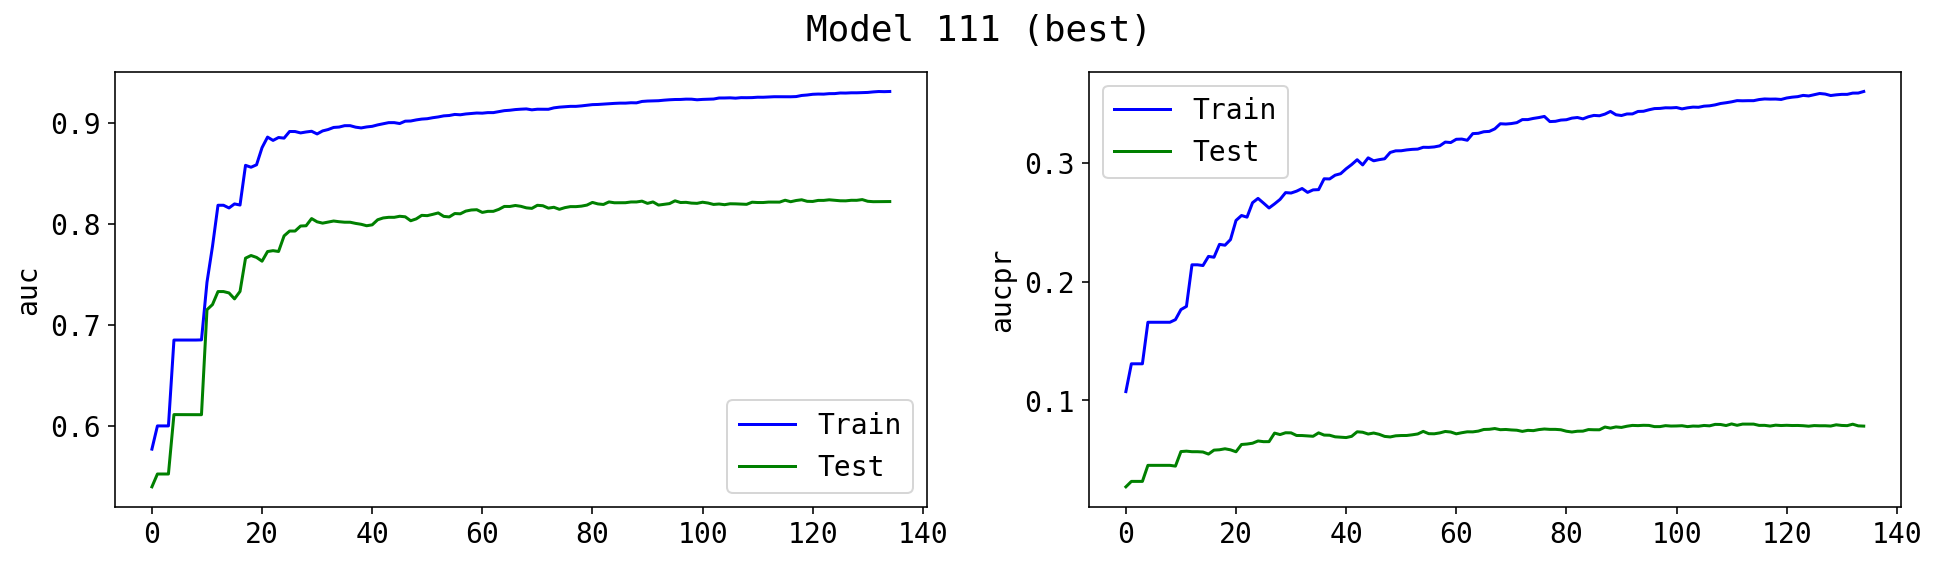

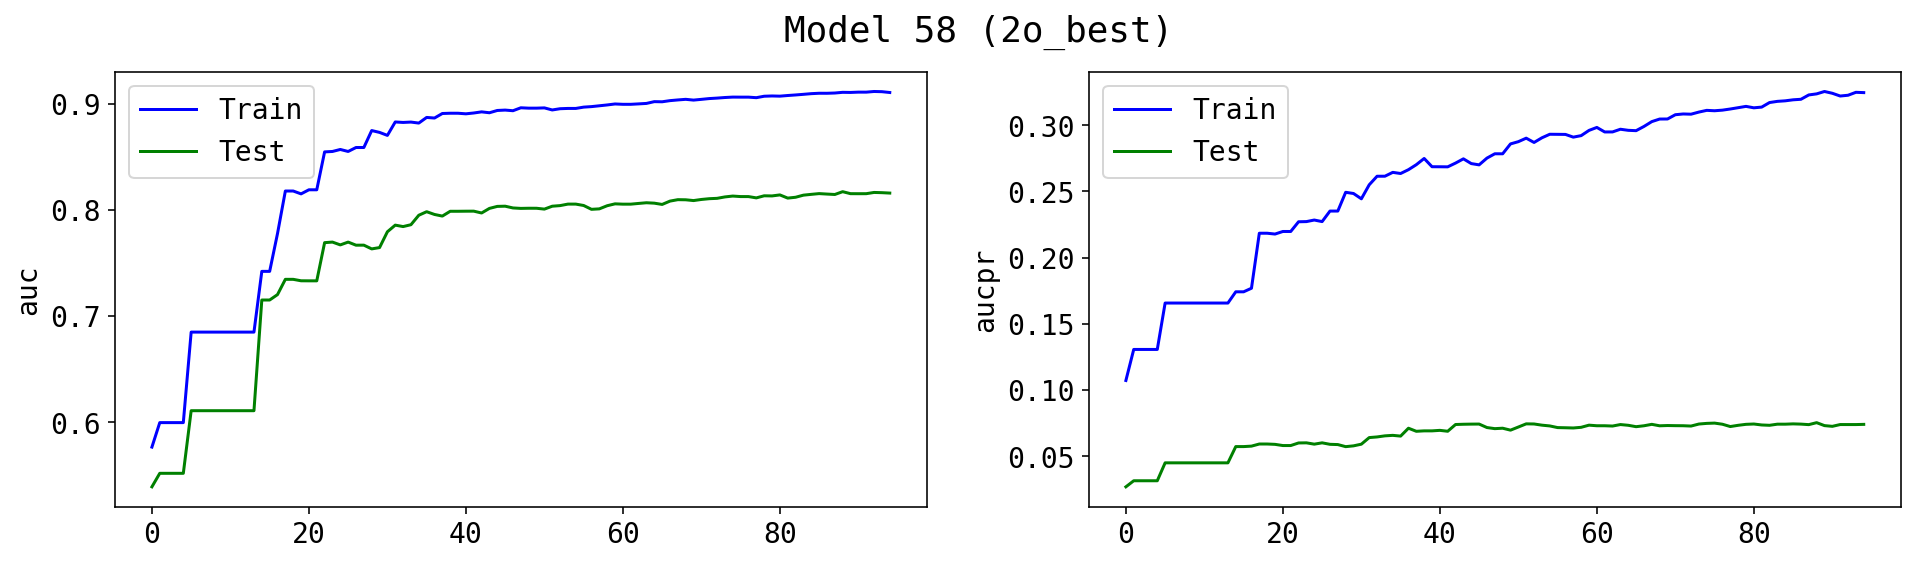

In [412]:
# retrieve performance metrics
for mi in selected_models:
    results = moo_model[mi].evals_result()
    epochs = len(results['validation_0']['aucpr'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots(1,2,figsize=(16,4))
    for i,m in enumerate(['auc','aucpr']):
        ax[i].plot(x_axis, results['validation_0'][m], label='Train', color='blue')
        ax[i].plot(x_axis, results['validation_1'][m], label='Test', color='green')
        ax[i].legend()
        ax[i].set_ylabel(m)

    plt.suptitle(f'Model {mi} ({models_description[mi]})',fontsize=18)

> As expected the training set overestimate the performance of the models compared to the test set.


Model 111 (best)
Best Threshold=0.007305, G-Mean=0.754

Model 58 (2o_best)
Best Threshold=0.005725, G-Mean=0.743


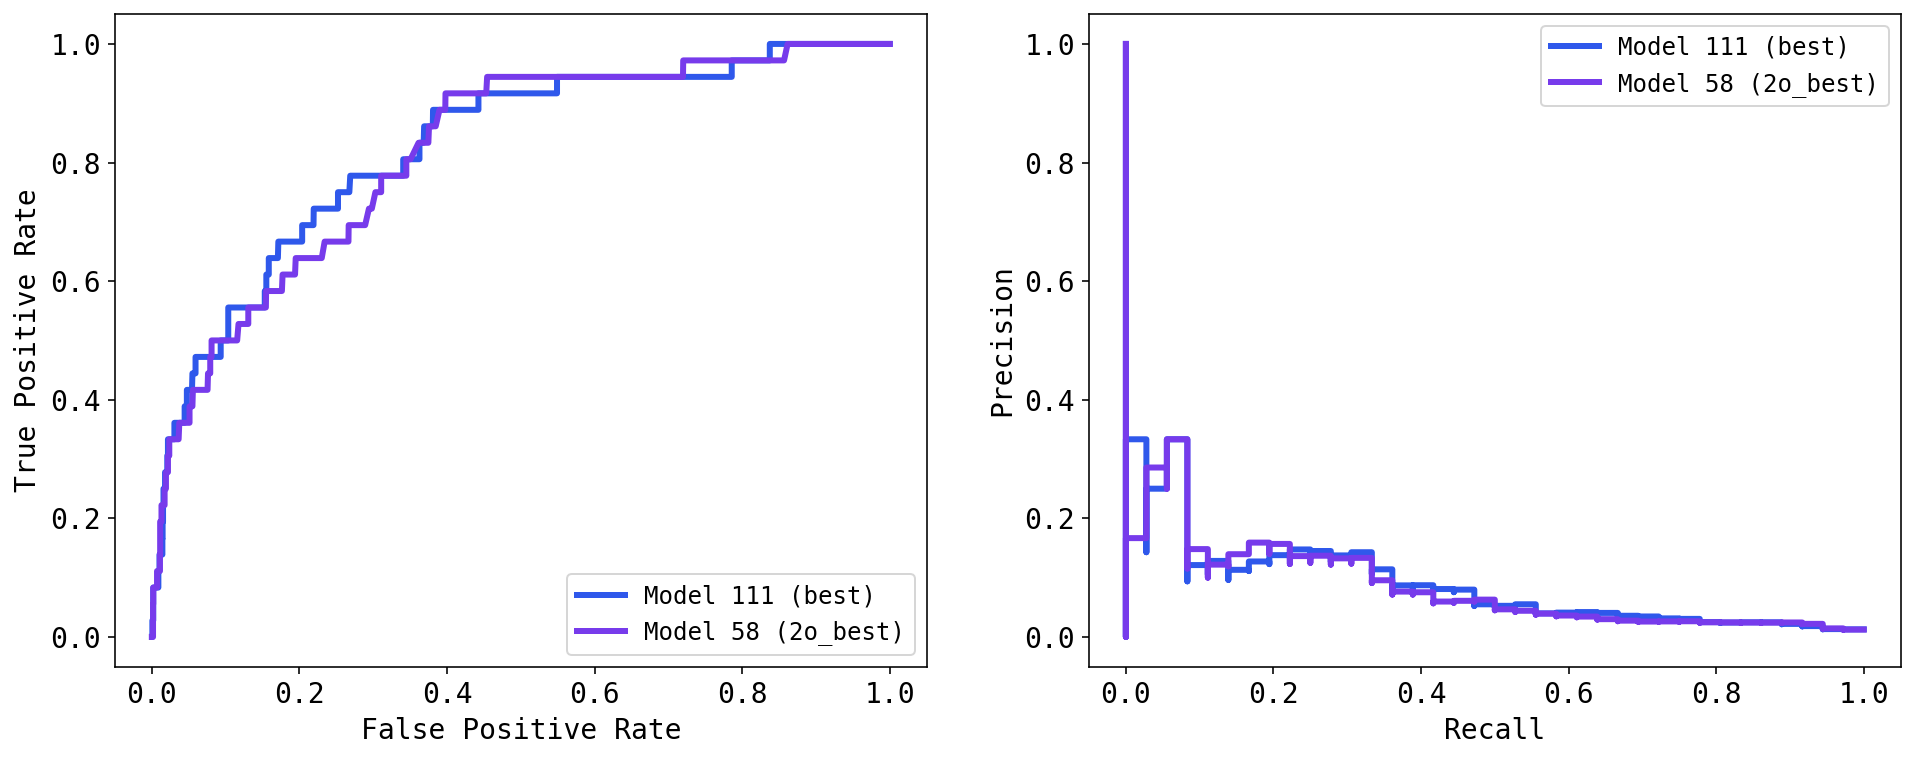

In [413]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(1,2, figsize=(16,6))

for i in selected_models:
    print(f'\nModel {i} ({models_description[i]})')
    clf = moo_model[i]
    y_score = clf.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax[0]
                                                         , lw=3
                                                         , label=f'Model {i} ({models_description[i]})')

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
#     ax[0].scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    
    prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax[1]
                                                         , lw=3
                                                         , label=f'Model {i} ({models_description[i]})')
for axi in ax.flatten():
    axi.legend(fontsize=12)

> ROC and PR curves for the test set.


Model 111 (best)
Best Threshold=0.007305, G-Mean=0.754

Model 58 (2o_best)
Best Threshold=0.005725, G-Mean=0.743


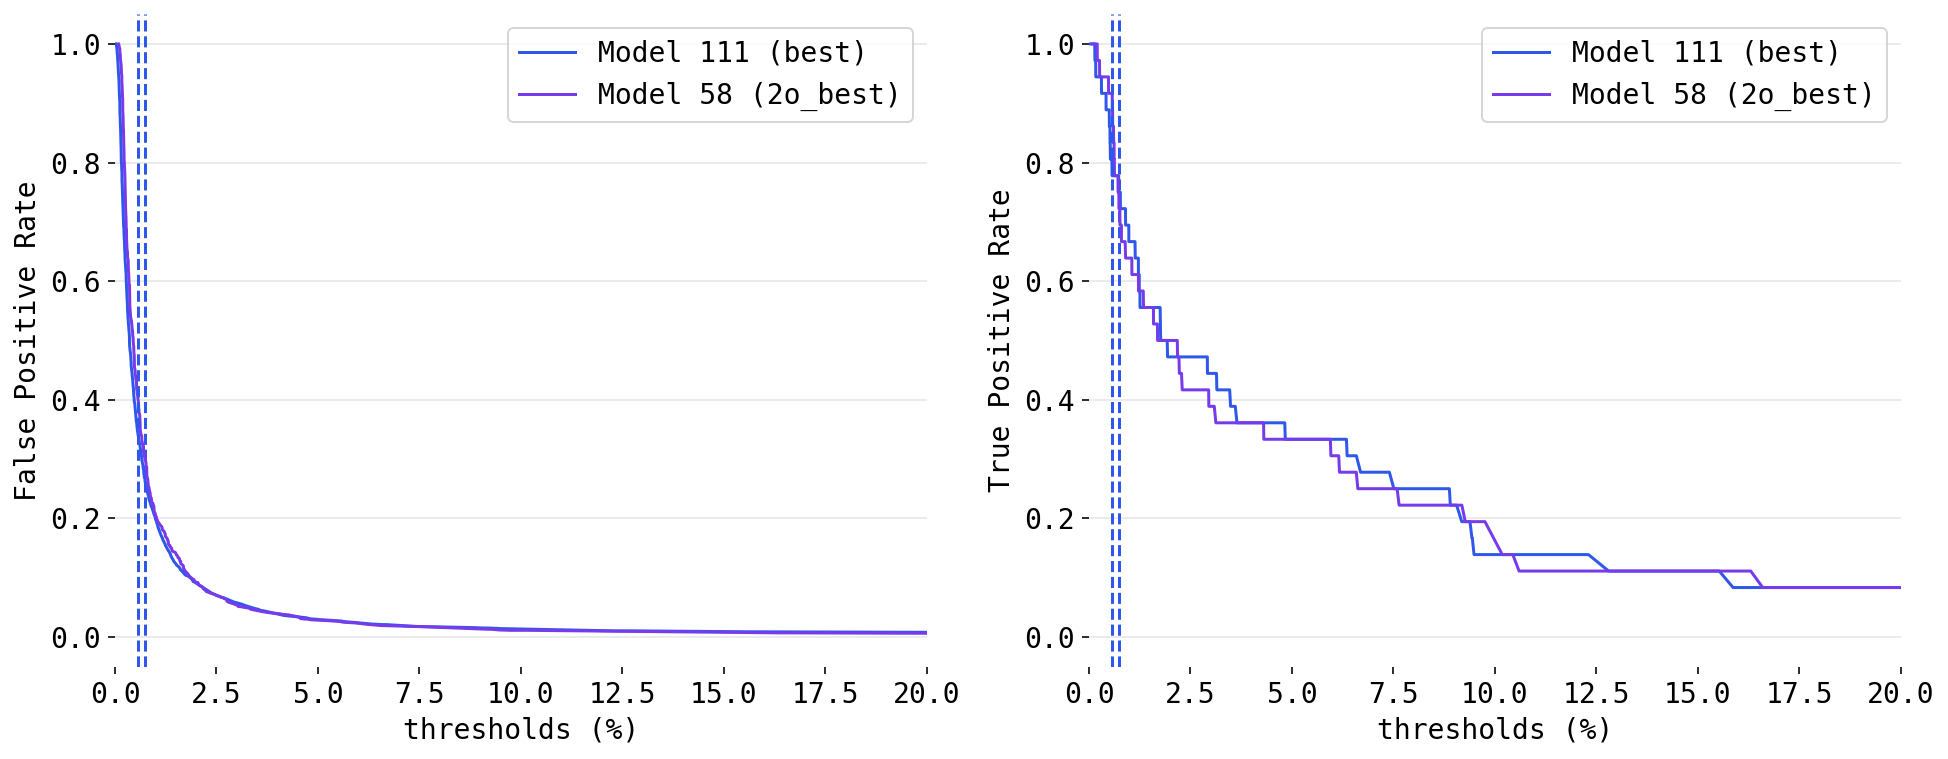

In [378]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(1,2, figsize=(16,6))

for i in selected_models:
    print(f'\nModel {i} ({models_description[i]})')
    clf = moo_model[i]
    y_score = clf.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
    
    ax[0].plot(thresholds*100, fpr, label=f'Model {i} ({models_description[i]})')
    ax[0].set(xlabel='thresholds (%)', ylabel='False Positive Rate', xlim=(0,20))
    
    ax[1].plot(thresholds*100, tpr, label=f'Model {i} ({models_description[i]})')
    ax[1].set(xlabel='thresholds (%)', ylabel='True Positive Rate', xlim=(0,20))

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    
    ax[0].axvline(x=100*thresholds[ix],ls='--')
    ax[1].axvline(x=100*thresholds[ix],ls='--')

for axi in ax.flatten():
    axi.legend(fontsize=14)
    axi = clean_ax(axi, n=4)  
    axi.grid(True, axis='y', alpha=0.3)

> Trade off: increase the threshold and we get lower FPR, but also lower TPR. Threshold for maximum ROC_AUC plotted in dash lines.

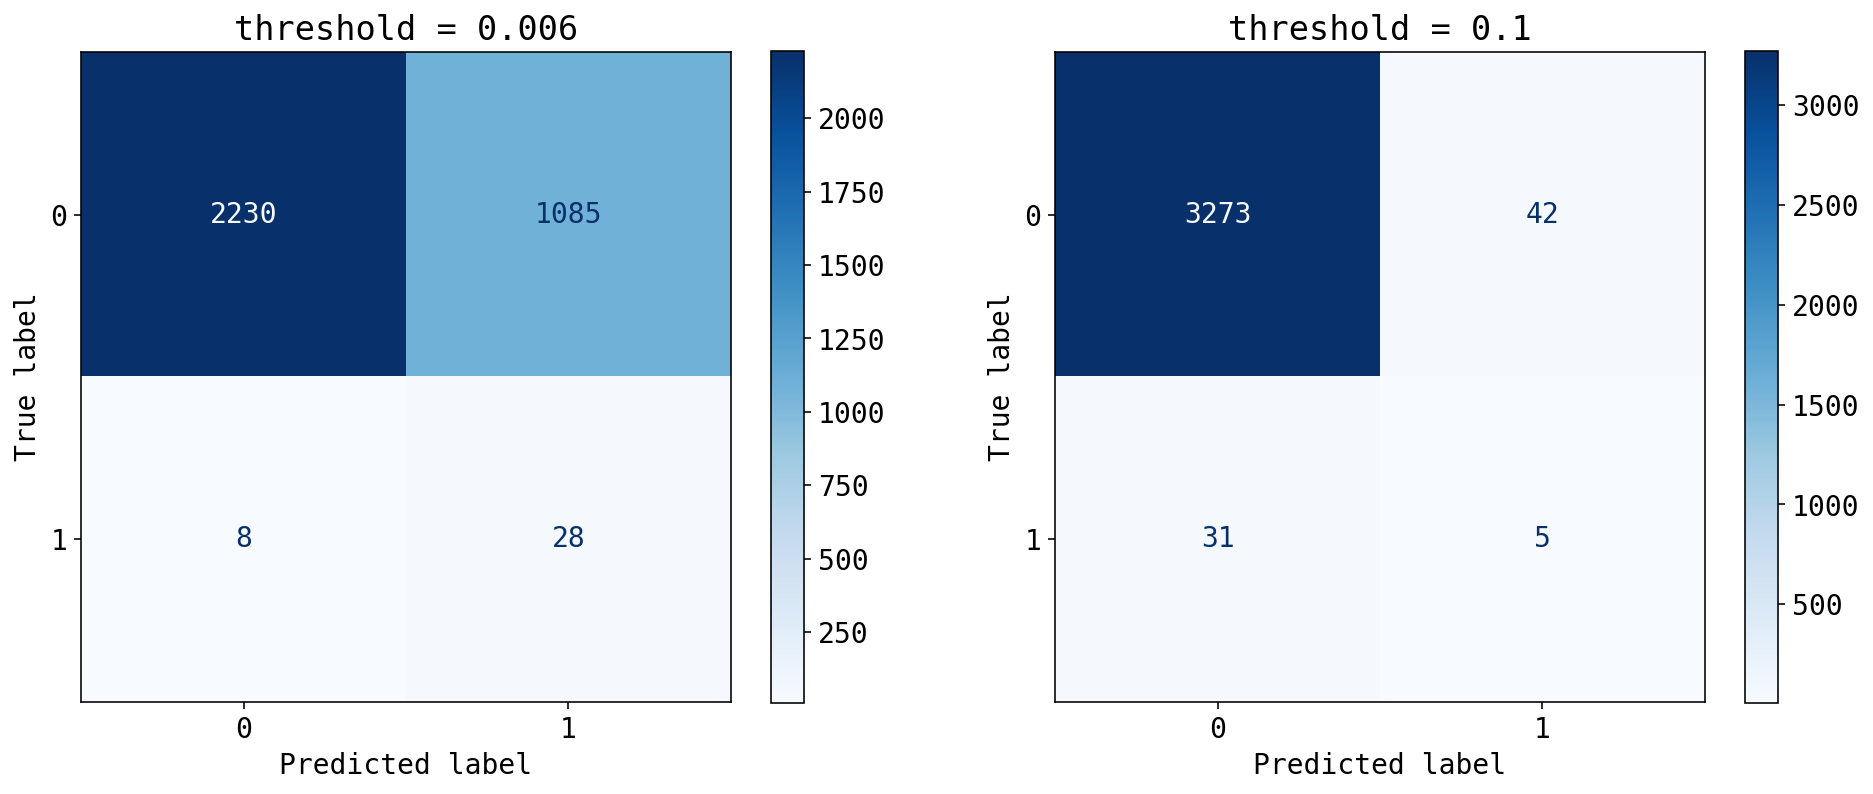

In [399]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

thresholds = [0.006, 0.1]

fig, axs = plt.subplots(1, 2, figsize=(16,6))
i = selected_models[0]
for t, ax in zip(thresholds, axs.flatten()):
    clf = moo_model[i]
#     plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', ax = ax )  

    predictions = (clf.predict_proba(X_test)[:, 1] > t).astype('float')
    
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
    disp.plot(ax=ax, cmap='Blues')
    ax.set(title=f'threshold = {t}')

    

> Demonstration of the effect of the threshold for the test set. Higher threshold means lower FTR, but also lower TPR.

In [401]:
from sklearn.metrics import classification_report
tresh = 0.007

def predict_class(y_proba, threshold):
    if y_proba > threshold:
        return 1
    else:
        return 0
    
print('Test set: \n')
i = selected_models[0]
for t in thresholds:
    print(f'>> Model {i} ({models_description[i]}), treshold = {t:.3f}' ) 

    y_pred  =(moo_model[i].predict_proba(X_test)[:, 1] > t).astype('float')
    
    print(classification_report(y_test, y_pred) )

Test set: 

>> Model 111 (best), treshold = 0.006
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      3315
           1       0.03      0.78      0.05        36

    accuracy                           0.67      3351
   macro avg       0.51      0.73      0.43      3351
weighted avg       0.99      0.67      0.80      3351

>> Model 111 (best), treshold = 0.100
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3315
           1       0.11      0.14      0.12        36

    accuracy                           0.98      3351
   macro avg       0.55      0.56      0.55      3351
weighted avg       0.98      0.98      0.98      3351



> Demonstration of the threshold effect for precision and recall.

# Feature importance
We are going to use the shap lib for computing the feature importances.

In [402]:
import shap

moo_explainer = {}
moo_shap_values = {}

for i in selected_models:
    print("- Calculating shap values for moo model %4d" %i)
    moo_explainer[i] = shap.TreeExplainer(moo_model[i])
    moo_shap_values[i] = moo_explainer[i].shap_values(X_train)

- Calculating shap values for moo model  111
- Calculating shap values for moo model   58


Model 111 (best)


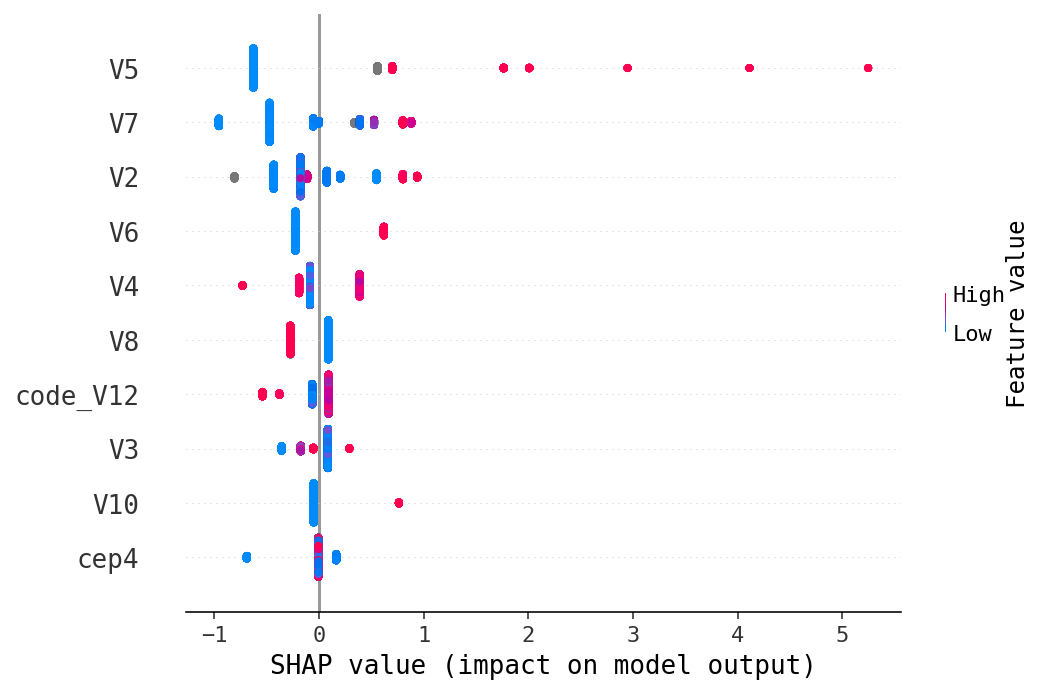

Model 58 (2o_best)


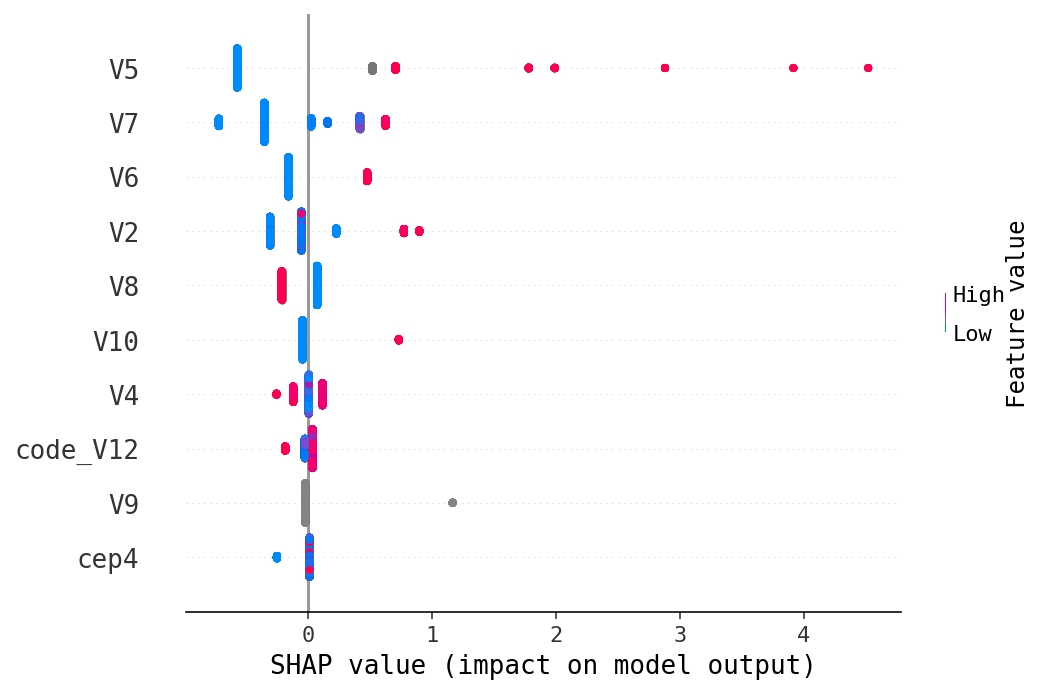

In [403]:
for i in selected_models:
    print(f'Model {i} ({models_description[i]})')
    shap.summary_plot(moo_shap_values[i], X_train, max_display=10, )

> As expected from the exploration phase, V5 and V7 are very useful in discriminate the classes. They might be related to financial data.

> No date feature nor location feature seems to have decisive contribution to the model.

# Conclusions

> Since this is a highly imbalanced dataset, the production phase should take place considering the economic impact of the FPR and TPR trade off. Considering both opportunity costs and delinquency cost.